# Data from 2017 Physics Analysis survey. 
## Survey by: Sebastian Neubert @seneubert

### Result summary

- 49 analysis were published, out of that 16 returned data on their input data sizes. 
- We asked for ntuple size after stripping. Analyses could specify real data, MC and "other" samples, where other is for control channels and the like. All numbers are in GB or GBfb

- Total data size reported: 9458.9 GB
- Average per analysis: 591.1 GB
- Average scaled to 49 analyses published in 2017: 28968 GB
- Total reported normalized to luminosity (expect larger files from Run II!): 3358 GB fb
- Average normalized to lumi: 210 GB fb
- Average scaled to 49 analyses  published in 2017: 10284 Gb fb
- The benchmark that should be used to budget storage needed (with contingency): 11 TB fb per year


### Data

In [14]:
sData=[382,35,350,21.6,3970,249,180,400,230,20,6,208,219,13.6,26,5]
sMC=[5,6,10,22,515,1.6,110,224,110,6,15,1,37.5,0.5,3,10]
lumi=[4.5,1.3,1.6,2,3,3,2,3,3,3,3,3,3,3,3,1.6]
sOther=[1017,130,20,6.2,60,11.4,676,0,100,2,4,9,1.5,21,2,7]

In [135]:
# style
%run header

## Average data size distribution per analysis (all entries)

In [132]:
# average data size distribution per analysis
sData_avg = np.mean(sData)
sMC_avg = np.mean(sMC)
sOther_avg = np.mean(sOther)

### Total average datasize per analysis

In [134]:
print str(np.around(sData_avg+sMC_avg+sOther_avg, decimals=2))+" GB"

591.18 GB


### Distribution between real data, simulation and other (calibration) data in the total size on average

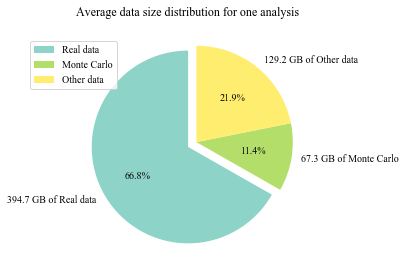

In [101]:
size = np.around([sData_avg, sMC_avg, sOther_avg], decimals=1)
labels = [str(s)+" GB" for s in size]
real_labels = ['Real data', 'Monte Carlo', 'Other data']
full_label = [x +' of '+ y for x,y in zip(labels, real_labels)]
explode = (0.1, 0, 0)
colors = plt.cm.Set3(np.linspace(0,1,3))

fig, ax = plt.subplots()
pie = ax.pie(size, explode=explode, labels=full_label, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax.axis('equal')  
fig.suptitle('Average data size distribution for one analysis')
plt.legend(pie[0], real_labels, loc=0)
plt.show()

## Average data size distribution per analysis (without outliers)

In [104]:
import pandas as pd
dframe = pd.DataFrame(
    {'data': sData,
     'mc': sMC,
     'other': sOther,
     'lumi': lumi
    })
dframe['total'] = dframe['data']+dframe['mc']+dframe['other']

# exclude outliers
from scipy import stats
clean = dframe[(np.abs(stats.zscore(dframe)) < 3).all(axis=1)]
clean.sort_values('total', ascending=False)

,data,lumi,mc,other,total
6,180.0,2.0,110.0,676.0,966.0
7,400.0,3.0,224.0,0.0,624.0
8,230.0,3.0,110.0,100.0,440.0
2,350.0,1.6,10.0,20.0,380.0
5,249.0,3.0,1.6,11.4,262.0
12,219.0,3.0,37.5,1.5,258.0
11,208.0,3.0,1.0,9.0,218.0
1,35.0,1.3,6.0,130.0,171.0
3,21.6,2.0,22.0,6.2,49.8
13,13.6,3.0,0.5,21.0,35.1


### Total average datasize per analysis (without outliers):

In [105]:
print str(np.around(clean['total'].mean(), decimals=2))+" GB"

250.71 GB


### Distribution between data, simulation and other (calibration) in the total size

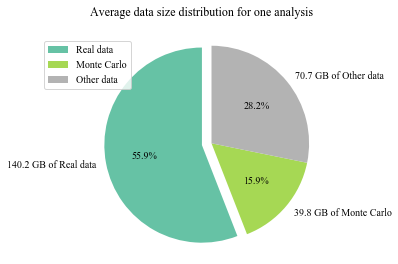

In [106]:
size = np.around([clean['data'].mean(), clean['mc'].mean(), clean['other'].mean()], decimals=1)
labels = [str(s)+" GB" for s in size]
real_labels = ['Real data', 'Monte Carlo', 'Other data']
full_label = [x +' of '+ y for x,y in zip(labels, real_labels)]
explode = (0.1, 0, 0)
colors = plt.cm.Set2(np.linspace(0,1,3))

fig, ax = plt.subplots()
pie = ax.pie(size, explode=explode, labels=full_label, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax.axis('equal')  
fig.suptitle('Average data size distribution for one analysis')
plt.legend(pie[0], real_labels, loc=2)
plt.show()

In [107]:
nframe = dframe.groupby(['lumi'])['data', 'mc', 'other'].mean()
nframe

,data,mc,other
lumi,,,
1.3,35.00,6.00,130.00
1.6,177.50,10.00,13.50
2.0,100.80,66.00,341.10
3.0,534.16,91.36,21.09
4.5,382.00,5.00,1017.00


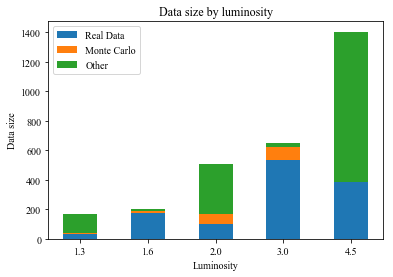

In [109]:
N = len(nframe.index)
ind = np.arange(N)
width = 0.50

p1 = plt.bar(ind, nframe['data'], width)
p2 = plt.bar(ind, nframe['mc'], width, bottom=nframe['data'])
p3 = plt.bar(ind, nframe['other'], width, bottom=nframe['data']+nframe['mc'])

plt.ylabel('Data size')
plt.title('Data size by luminosity')
plt.xlabel('Luminosity')
plt.xticks(ind, (nframe.index))
plt.legend((p1[0], p2[0], p3[0]), ('Real Data', 'Monte Carlo', 'Other'))

plt.show()

### Summary

In [131]:
nanalyses=len(sData)
total=sum(sData)+sum(sMC)+sum(sOther)
res = dict()
res["Total data"] = str(total) + " GB"
average=total/nanalyses
res["Average"] = str(average) + " GB"
res["Total for 2017 publications"] = str(average*49) + " GB"

sDL=zip(sData,lumi)
sMCL=zip(sMC,lumi)
sOtherL=zip(sOther,lumi)
nData=[d[0]/d[1] for d in sDL]
nMC=[d[0]/d[1] for d in sMCL]
nOther=[d[0]/d[1] for d in sOtherL]
totalPerfb=sum(nData)+sum(nMC)+sum(nOther)
res["Total data / fb-1"] = str(totalPerfb) + " GB fb"
averagePerfb=totalPerfb/nanalyses
res["Average data / fb-1"] = str(averagePerfb) + " GB fb"
res["Total for 2017 publications"] = str(averagePerfb*49) + " GB fb"

df=pd.DataFrame(res.items())
df

,0,1
0,Total data,9458.9 GB
1,Average,591.18125 GB
2,Total data / fb-1,3350.72179487 GB fb
3,Average data / fb-1,209.420112179 GB fb
4,Total for 2017 publications,10261.5854968 GB fb
